## Project Overview

This project focuses on analyzing financial data retrieved from the Nasdaq Data Link API. The primary objective is to extract and analyze the MER/F1 data table, which contains essential financial metrics such as balance sheets, cash flow statements, and income statements for various companies.

### Primary Goals
- Extract financial data for a selected group of companies.
- Analyze financial performance over time with an emphasis on metrics like Accrued Expenses Turnover.
- Explore differences in financial performance across companies and regions.


In [89]:
import requests
import json
import pandas as pd
import config
import matplotlib.pyplot as plt

api_key = config.API_KEY

In [43]:
api_url='https://data.nasdaq.com/api/v3/datatables/MER/F1.json'

In [44]:
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10 
}


### Optional Query Parameters

- **Limit Rows Per Request**:  
  You can limit the number of rows returned per request by specifying the `qopts.per_page` parameter.  
  Example:  
  `qopts.per_page=10`

- **Filter by Ticker**:  
  To filter the data by a specific ticker value, use the `ticker` parameter.  
  Example:  
  `ticker=SPY`

- **Specify Columns in the Response**:  
  You can specify which columns to include in the response using the `qopts.columns` parameter.  
  Example:  
  `qopts.columns=ticker,date,shares_outstanding`

- **Filter by Multiple Ticker Values**:  
  You can filter rows by multiple ticker values by separating them with commas.  
  Example:  
  `ticker=SPY,IWM,GLD`


In [45]:
json_data = requests.get(api_url, params=parameters).json()

In [46]:
print(json_data)

{'datatable': {'data': [[2438, 1868192544, -1802, 10.481948, '2011-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1868216112, -1802, 8.161754, '2011-09-30', 'Q3', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60325', '(49) 69 910 00', '(49) 69 910 34 225', 'www.db.com', '2024-12-31', 'Accrued Expenses Turnover', 'Derived'], [2438, 1885063456, -1802, 10.788213, '2012-06-30', 'Q2', 'U', 'EUR', 'True', 'Deutsche Bank AG', 'Deutsche Bank AG', 'Active', 'DEU', 'Europe', 1159508, '5.1.1', 'DB', 'NYS', 'Taunusanlage 12', None, None, None, 'Frankfurt am Main', None, 'DEU', '60

In [47]:
parameters = {
    'api_key': api_key,
    'qopts.per_page': 10000
}

json_data = requests.get(api_url, params=parameters).json()

In [48]:
data = json_data['datatable']['data']
columns = [col['name'] for col in json_data['datatable']['columns']]

df_metric = pd.DataFrame(data, columns=columns)
df_metric.head()

,compnumber,reportid,mapcode,amount,reportdate,reporttype,auditorstatus,currency,consolidated,longname,...,city,statecode,country,zipcode,phonenumber,faxnumber,website,fye,indicator,statement
0,2438,1868192544,-1802,10.481948,2011-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
1,2438,1868216112,-1802,8.161754,2011-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
2,2438,1885063456,-1802,10.788213,2012-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
3,2438,1885087024,-1802,9.437545,2012-09-30,Q3,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived
4,2438,1901934112,-1802,8.755041,2013-06-30,Q2,U,EUR,True,Deutsche Bank AG,...,Frankfurt am Main,None,DEU,60325,(49) 69 910 00,(49) 69 910 34 225,www.db.com,2024-12-31,Accrued Expenses Turnover,Derived


In [49]:
print(df_metric.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   compnumber     10000 non-null  int64  
 1   reportid       10000 non-null  int64  
 2   mapcode        10000 non-null  int64  
 3   amount         10000 non-null  float64
 4   reportdate     10000 non-null  object 
 5   reporttype     10000 non-null  object 
 6   auditorstatus  9999 non-null   object 
 7   currency       10000 non-null  object 
 8   consolidated   10000 non-null  object 
 9   longname       10000 non-null  object 
 10  shortname      10000 non-null  object 
 11  status         10000 non-null  object 
 12  countrycode    10000 non-null  object 
 13  region         10000 non-null  object 
 14  cik            10000 non-null  int64  
 15  mic            10000 non-null  object 
 16  ticker         9380 non-null   object 
 17  exchange       10000 non-null  object 
 18  address

### Important Columns for Accrued Expense Turnover Analysis

The following columns are critical for analyzing the **Accrued Expense Turnover**:

- **indicator**: Represents specific financial indicators, such as accrued expenses, which are essential for calculating and analyzing the Accrued Expense Turnover ratio.
- **country**: Helps to examine the geographical context, allowing for comparisons of accrued expenses turnover between companies in different countries.
- **longname**: Identifies the company or entity, which is necessary for distinguishing between different companies in the dataset.
- **reportdate**: Provides the date of the financial report, allowing for time-based analysis and understanding how the accrued expense turnover changes over time.
- **reporttype**: Indicates the type of financial statement (e.g., balance sheet or income statement), which is important for ensuring the correct context when analyzing accrued expenses.
- **amount**: Contains the financial data necessary for calculating the Accrued Expense Turnover ratio and understanding the financial performance of the company in relation to its expenses.


In [50]:
necessary_columns = [
    'indicator', 
    'country', 
    'longname', 
    'reportdate', 
    'reporttype', 
    'amount'
]

In [51]:
df_metric = df_metric[necessary_columns]
filtered_df =  df_metric[df_metric['indicator'] == 'Accrued Expenses Turnover']

In [62]:
filtered_df['amount'].describe()

count    139.000000
mean      26.908762
std       33.097291
min        4.689773
25%        9.675670
50%       13.753753
75%       31.777614
max      229.810427
Name: amount, dtype: float64

In [77]:
country_mapping = {
    'USA': 'United States of America',
    'DEU': 'Germany',
    'JPN': 'Japan',
    'CYM': 'Cayman Islands',
    'BHS': 'Bahamas',
    'IRL': 'Ireland',
    'GBR': 'Great Britain'
   
}

In [78]:
def full_name(short_name, country_mapping):
    return country_mapping[short_name]

In [80]:
filtered_df.loc[:, 'country_name'] = filtered_df.loc[:, 'country'].apply(lambda x: full_name(x, country_mapping))

In [82]:
updated_df = filtered_df.rename(columns={"longname": "company_name", "reportdate": "report_date", "reporttype": "report_type"})

In [84]:
updated_df['country_name'].value_counts()

country_name
United States of America    31
Japan                       27
Cayman Islands              27
Ireland                     25
Bahamas                     19
Germany                      6
Great Britain                4
Name: count, dtype: int64

In [85]:
updated_df['report_date'] = pd.to_datetime(updated_df['report_date'])
updated_df = updated_df[(updated_df['report_date'].dt.year >= 2010) & (updated_df['report_date'].dt.year <= 2015)]

In [86]:
relevant_data = updated_df[['company_name', 'report_date', 'amount']]

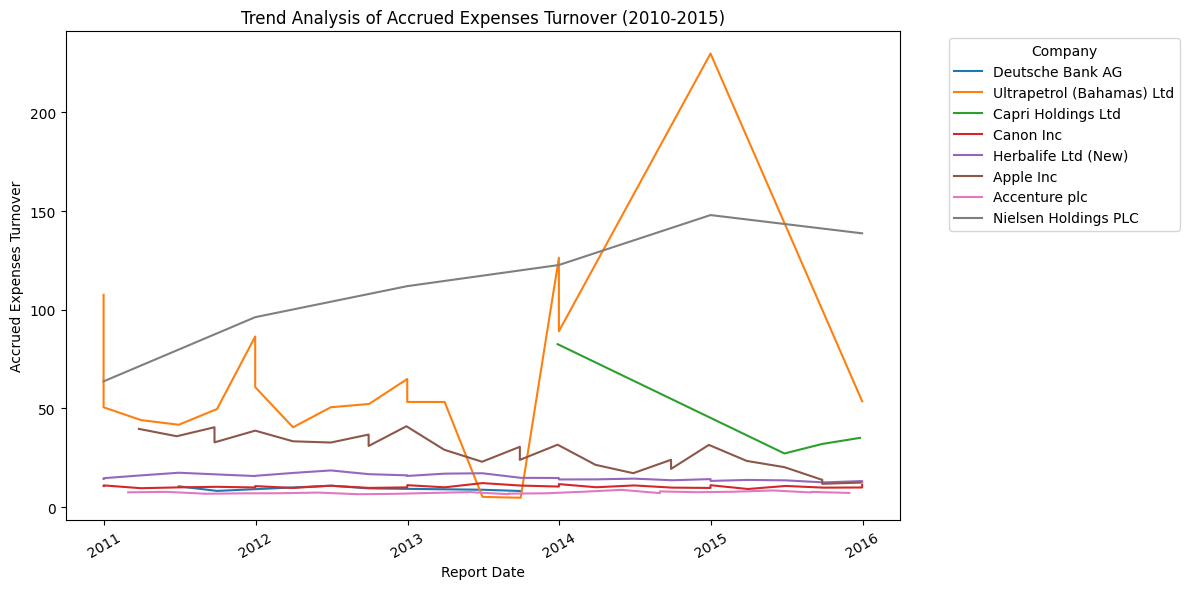

In [93]:
plt.figure(figsize=(12, 6))

for company in relevant_data['company_name'].unique():
    company_data = relevant_data[relevant_data['company_name'] == company]
    plt.plot(company_data['report_date'], company_data['amount'], label=company)
    plt.title('Trend Analysis of Accrued Expenses Turnover (2010-2015)')
    plt.xlabel('Report Date')
    plt.ylabel('Accrued Expenses Turnover')
    plt.xticks(rotation=30)
    plt.legend(title='Company', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
plt.show()

In [94]:
country_avg = updated_df.groupby('country_name')['amount'].mean()

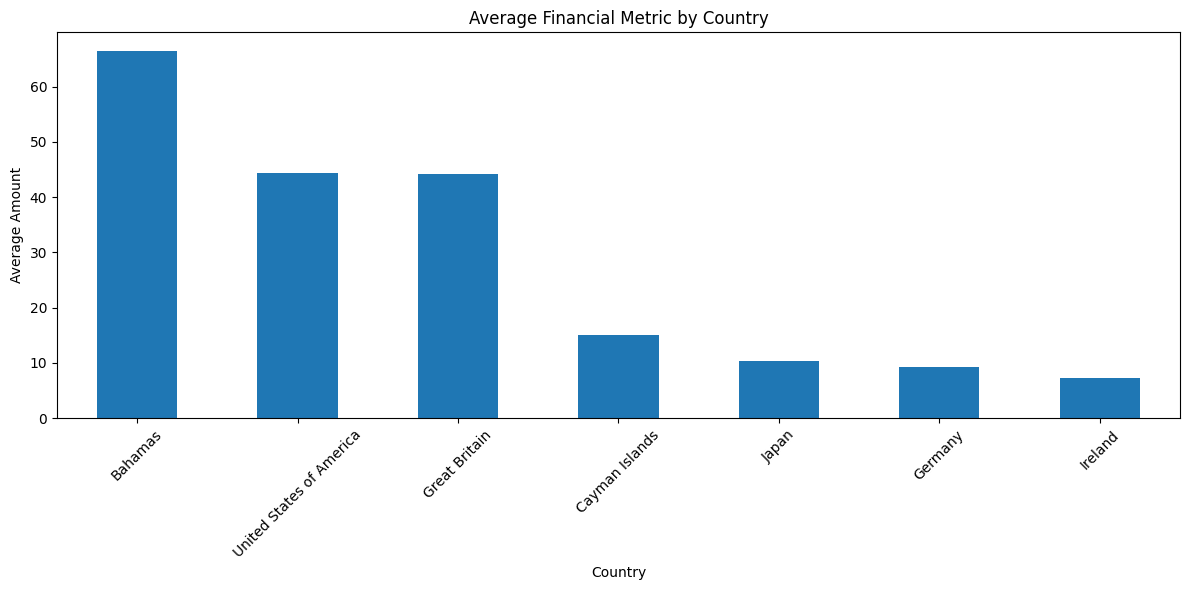

In [95]:
plt.figure(figsize=(12, 6))
country_avg.sort_values(ascending=False).plot(kind='bar')
plt.title('Average Financial Metric by Country')
plt.xlabel('Country')
plt.ylabel('Average Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()